In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Bidirectional, Activation
from tensorflow.keras.layers import Embedding
import keras.backend as K
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("autos.csv")
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                260956 non-null  int64 
 1   dateCrawled          260956 non-null  object
 2   name                 260956 non-null  object
 3   seller               260956 non-null  object
 4   offerType            260956 non-null  object
 5   price                260956 non-null  int64 
 6   abtest               260956 non-null  object
 7   vehicleType          260956 non-null  object
 8   yearOfRegistration   260956 non-null  int64 
 9   gearbox              260956 non-null  object
 10  powerPS              260956 non-null  int64 
 11  model                260956 non-null  object
 12  kilometer            260956 non-null  int64 
 13  monthOfRegistration  260956 non-null  int64 
 14  fuelType             260956 non-null  object
 15  brand                260956 non-nu

In [7]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,...,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [8]:
df = df.drop(['index', 'name', 'seller', 'offerType', 'nrOfPictures'], axis=1)

In [9]:
df = df[df['price'] > 0]
df = df.reset_index()

In [10]:
a = np.array(df['yearOfRegistration'])
b = np.array(df['monthOfRegistration'])

In [11]:
c = (((2017 - a) * 12) + b)/12
c = np.round(c, 1)

In [12]:
df['ageInYear'] = c

In [13]:
df = df.drop(['index'], axis=1)

In [14]:
df = df[df['price'] < 13500]

In [15]:
df.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,ageInYear
0,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,16.5
1,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,9.6
2,2016-04-04 17:36:23,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,22.8
3,2016-04-01 20:48:51,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,13.7
4,2016-03-26 19:54:18,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,14.0


In [16]:
a = np.array(df['postalCode'])

In [17]:
postcode = pd.read_csv("german-postcodes.csv", delimiter=';')

In [18]:
postcode = (postcode.drop_duplicates(keep='first').reset_index()).drop(['index', 'Ort'], axis=1)

In [19]:
post_dict = {}
for i in range(0,len(postcode)):
    post_dict[postcode.Plz[i]] = postcode.Bundesland[i]

In [20]:
def mp(entry):
    return post_dict[entry] if entry in post_dict else entry
mp = np.vectorize(mp)
a = mp(a)
a = a.astype('object')
a

array(['Bayern', 'Hessen', 'Nordrhein-Westfalen', ..., 'Niedersachsen',
       'Niedersachsen', 'Bayern'], dtype=object)

In [21]:
df['stateByPostalCode'] = a

In [22]:
df.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,ageInYear,stateByPostalCode
0,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,16.5,Bayern
1,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,9.6,Hessen
2,2016-04-04 17:36:23,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,22.8,Nordrhein-Westfalen
3,2016-04-01 20:48:51,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,13.7,Rheinland-Pfalz
4,2016-03-26 19:54:18,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,14.0,Bayern


In [23]:
X = df[['abtest', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'ageInYear', 'stateByPostalCode']]
y = df['price']

In [24]:
X['abtest'] = pd.factorize(X['abtest'])[0]
X['vehicleType'] = pd.factorize(X['vehicleType'])[0]
X['gearbox'] = pd.factorize(X['gearbox'])[0]
X['model'] = pd.factorize(X['model'])[0]
X['fuelType'] = pd.factorize(X['fuelType'])[0]
X['brand'] = pd.factorize(X['brand'])[0]
X['notRepairedDamage'] = pd.factorize(X['notRepairedDamage'])[0]
X['stateByPostalCode'] = pd.factorize(X['stateByPostalCode'])[0]

In [25]:
X.head()

,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageInYear,stateByPostalCode
0,0,0,0,75,0,150000,0,0,0,16.5,0
1,0,0,0,69,1,90000,1,1,0,9.6,1
2,0,1,0,102,2,150000,0,2,1,22.8,2
3,0,2,0,109,3,150000,0,3,0,13.7,3
4,1,1,0,105,4,150000,0,4,0,14.0,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=26)

In [34]:
model = Sequential()
model.add(Embedding(len(X_train), 8, input_length = X_train.shape[1]))
model.add((LSTM(16, activation="relu", return_sequences=True, dropout = 0.3)))
model.add((LSTM(16, activation="linear", dropout=0.2)))
model.add(Activation('relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss=['mean_squared_logarithmic_error'] , optimizer='Adam', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 8)             1597368   
                                                                 
 lstm_6 (LSTM)               (None, 11, 16)            1600      
                                                                 
 lstm_7 (LSTM)               (None, 16)                2112      
                                                                 
 activation_3 (Activation)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,601,097
Trainable params: 1,601,097
Non-trainable params: 0
_________________________________________________________________


In [35]:
X_train.shape

(199671, 11)

In [36]:
model.compile(loss=['mean_squared_logarithmic_error'] , optimizer='Adam', metrics=['mse'])

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=40)

Epoch 1/40
3120/3120 [==============================] - 95s 29ms/step - loss: 1.7490 - mse: 8635047.0000 - val_loss: 0.5720 - val_mse: 6717342.5000
Epoch 2/40
3120/3120 [==============================] - 90s 29ms/step - loss: 0.5745 - mse: 6424401.5000 - val_loss: 0.5592 - val_mse: 6986814.0000
Epoch 3/40
3120/3120 [==============================] - 90s 29ms/step - loss: 0.5333 - mse: 6029277.0000 - val_loss: 0.4847 - val_mse: 5907802.5000
Epoch 4/40
3120/3120 [==============================] - 90s 29ms/step - loss: 0.4510 - mse: 5480217.0000 - val_loss: 0.3525 - val_mse: 4201015.0000
Epoch 5/40
3120/3120 [==============================] - 91s 29ms/step - loss: 0.3833 - mse: 4581614.5000 - val_loss: 0.3614 - val_mse: 5141839.0000
Epoch 6/40
3120/3120 [==============================] - 94s 30ms/step - loss: 0.3591 - mse: 4161370.5000 - val_loss: 0.3502 - val_mse: 5102779.5000
Epoch 7/40
3120/3120 [==============================] - 92s 29ms/step - loss: 0.3426 - mse: 3890917.7500 - val_l

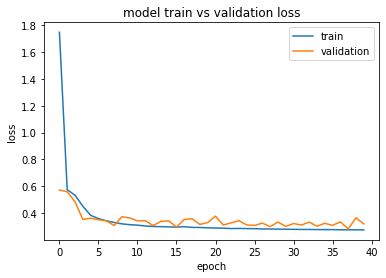

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
joblib.dump(model, "model_002.sav")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\dense
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-02 21:52:33         3175
metadata.json                                  2023-01-02 21:52:33          

['model_002.sav']